In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [151]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [152]:
data = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='latin')

In [153]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [154]:
data.shape

(541909, 8)

In [155]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [156]:
print("%18s %10s  %10s%12s" % ("Column Name","DType","Distinct","NA Values"))
for col in data.columns:
    dtyp = data[col].dtype
    uniq = data[col].nunique()
    na = data[col].isnull().sum()
    print("%18s %10s %10s %12s" % (col, dtyp, uniq, na))

       Column Name      DType    Distinct   NA Values
         InvoiceNo     object      25900            0
         StockCode     object       4070            0
       Description     object       4223         1454
          Quantity      int64        722            0
       InvoiceDate     object      23260            0
         UnitPrice    float64       1630            0
        CustomerID    float64       4372       135080
           Country     object         38            0


**OBSERVATIONS**
- Total customer is 4372
- the customer came from different 38 countries
- the total unique product sold is 4070
- total billing for 4372 customer is 25900 so, many customer has repetative and multiple bills

**MISSING VALUES**

In [157]:
df = data.dropna()

In [158]:
#Convert decscription column to lower case
df['Description'] = df['Description'].str.lower()

In [159]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [160]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [161]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [162]:
# REMOVE THE DATA WITH NEGATIVE QUANTITY
df = df[df['Quantity'] > 0]

In [163]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

max_order = df.groupby('InvoiceNo')['Quantity'].count().reset_index().sort_values('Quantity',ascending=False)
max_order.head()

,InvoiceNo,Quantity
16242,576339,542
17524,579196,533
18165,580727,529
17128,578270,442
15081,573576,435


In [164]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [165]:
# customer by countries
customer_by_country = df.copy()
customer_by_country.drop_duplicates(subset=['CustomerID'],inplace=True)
customer_by_country['Country'].value_counts().head()

United Kingdom    3921
Germany             94
France              87
Spain               28
Belgium             24
Name: Country, dtype: int64

* Maximum customers came from UK

**Total expenditure of customer**

In [166]:
df.groupby(by=['CustomerID'], as_index=False)['TotalPrice'].sum().head()

,CustomerID,TotalPrice
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [167]:
# maximum total price of a customer
df.groupby(by=['CustomerID'], as_index=False)['TotalPrice'].sum().sort_values('TotalPrice',ascending=False).head()

,CustomerID,TotalPrice
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194550.79
3009,16446,168472.50
1880,14911,143825.06


**Time Series Analysis**

In [168]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [169]:
# extract day, month and hour from datetime
df.insert(loc=2, column='Month', value = df.InvoiceDate.dt.month)
df.insert(loc=2, column='Day', value = (df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=2, column='Hour', value = df.InvoiceDate.dt.hour)

## Monthly sales

In [170]:
monthSale = df.groupby('Month', as_index=False)['TotalPrice'].sum()
monthSale.head()

,Month,TotalPrice
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560


In [171]:
#monthly sales with year
monthlySale = df['Monthly_Sales'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m')
monthlySale = df.groupby('Monthly_Sales',as_index=False)['TotalPrice'].sum()
monthlySale.head()

,Monthly_Sales,TotalPrice
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361


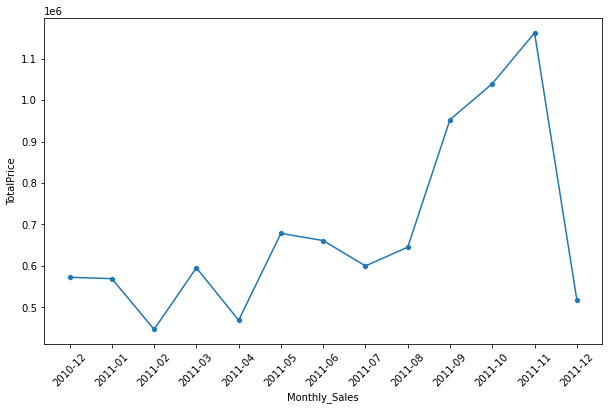

In [172]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Monthly_Sales', y='TotalPrice', data=monthlySale)
sns.scatterplot(x='Monthly_Sales', y='TotalPrice', data=monthlySale)
plt.xticks(rotation=45)
plt.show()

* There is gradual increase and decrease in Monthly sales but in 2011-11 there is great increase in sales and sudden it drop down, it will be intresting to find the reason behind it.

**How many orders per day?**

In [178]:
df.groupby('InvoiceNo')['Day'].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[4]    4033
[3]    3455
[2]    3185
[1]    2863
[5]    2831
[7]    2169
Name: Day, dtype: int64

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[12]        3129
[13]        2637
[11]        2276
[14]        2275
[10]        2226
[15]        2038
[9]         1394
[16]        1100
[8]          555
[17]         544
[18]         169
[19]         144
[7]           29
[20]          18
[6]            1
[11, 12]       1
Name: Hour, dtype: int64